<a href="https://colab.research.google.com/github/daniui/computational-intelligence-task/blob/main/mid-term/MidTerm_Task_Intelligence_Computing_(BERT)_Hilmy_Rahmadani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question no 1

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
#{"username":"danskuy","key":"45484454edbebbb79a736e62be4ad561"}

#od.download("https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset") use model_name_en
od.download("https://www.kaggle.com/datasets/anggapurnama/twitter-dataset-ppkm") #use model_name_ina

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dasnkuy
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/anggapurnama/twitter-dataset-ppkm


100%|██████████| 3.58M/3.58M [00:00<00:00, 4.07MB/s]

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import os
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support

from collections import defaultdict
from textwrap import wrap

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, AutoTokenizer, AutoModelForSequenceClassification, get_linear_schedule_with_warmup, BertForSequenceClassification

SEED = 42
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

1. In Google Colab, install the libraries necessary for running BERT models, including PyTorch and the Hugging Face Transformers library. Explain the roles of each library

- pandas: data manipulation and analysis, especially for structured data. It provides DataFrame objects that allow easy handling, filtering, and manipulation of data in tabular form.

- numpy: fundamental library for numerical computing in Python. It provides support for arrays and matrices, along with a collection of mathematical functions to operate on these data structures. NumPy is particularly useful for performing operations on large datasets efficiently.

- matplotlib: A plotting library for creating static, animated, and interactive visualizations in Python. pyplot is a module within Matplotlib that provides a MATLAB-like interface for making plots.

- seaborn: A data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn simplifies the creation of complex visualizations and comes with several built-in themes for better aesthetics.

- string: A module that contains common string operations and constants. It is often used for string manipulation tasks, such as removing punctuation.

- os: A module that provides a way to use operating system-dependent functionality, such as reading or writing to the file system, checking file paths, and executing system commands.

- sklearn: A machine learning library for Python that provides simple and efficient tools for data mining and data analysis.

- pytorch: An open-source machine learning library used for deep learning applications. It provides tools for building and training neural networks.
  - torch: The main PyTorch module for tensor operations.
  - nn: A submodule for building neural networks, providing various layers, loss functions, and utilities.
  - optim: A submodule that contains optimization algorithms for training neural networks.
  - Dataset and DataLoader: Classes for handling and loading data in batches, facilitating the training process.

- transformers: A library from Hugging Face that provides pre-trained transformer models for natural language processing tasks.
  - BertModel, BertTokenizer: Classes for using BERT models and tokenizers.
  - AdamW: An optimizer from the transformers library for fine-tuning models.
  - AutoTokenizer, AutoModelForSequenceClassification: Classes that automatically load the appropriate model/tokenizer based on the model name.
  - get_linear_schedule_with_warmup: A function for creating a learning rate scheduler that warms up for a specified number of steps and then decays linearly.


In [ ]:
df_sentiment = pd.read_csv('/content/twitter-dataset-ppkm/INA_TweetsPPKM_Labeled_Pure.csv', sep='\t')
df_sentiment

,Date,User,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,inewsdotid,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,vdvc_talk,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,tvOneNews,Kementerian Agama menerbitkan Surat Edaran Nom...,1
...,...,...,...,...
23639,2020-06-26 18:34:56+00:00,bananabluff,noelle loses a bet to akarsha and it somehow e...,1
23640,2020-06-19 15:14:07+00:00,Auqroix,they call her... weekeeshee...\n#butterflysoup...,1
23641,2020-06-18 23:45:26+00:00,Auqroix,"put out what you wanna see more of, amirite ga...",1
23642,2020-06-15 23:17:22+00:00,Auqroix,"i don't need anybody, i'm fine here on my own\...",1


In [ ]:
df_sentiment = pd.read_csv('/content/twitter-dataset-ppkm/INA_TweetsPPKM_Labeled_Pure.csv', sep='\t', usecols = ['Tweet', 'sentiment'])
df_sentiment

,Tweet,sentiment
0,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,Kementerian Agama menerbitkan Surat Edaran Nom...,1
...,...,...
23639,noelle loses a bet to akarsha and it somehow e...,1
23640,they call her... weekeeshee...\n#butterflysoup...,1
23641,"put out what you wanna see more of, amirite ga...",1
23642,"i don't need anybody, i'm fine here on my own\...",1


#Question no 2

In [ ]:
MODEL_NAME_ina = 'ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa'
MODEL_NAME_en = 'finiteautomata/bertweet-base-sentiment-analysis'

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME_ina)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME_ina)
model

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/476k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/899 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

- How BERT Tokenizes Input Data
BERT relies on a tokenizer to preprocess text into a format suitable for the model. The key steps in tokenization include:
Splitting sentences into tokens: BERT uses a WordPiece tokenizer that breaks down words into subword units to handle unknown or rare words effectively. It splits the input sentence into individual tokens.
Converting tokens to IDs: After tokenization, each token is mapped to an integer ID from BERT's vocabulary, which serves as the input to the model.
Adding special tokens: BERT requires special tokens, such as [CLS] (classification) token at the start and [SEP] (separator) token at the end of the input sequence. The tokenizer outputs tensors containing the token IDs, attention masks, and potentially token type IDs:
input_ids: Encoded token IDs of the input sentence.
attention_mask: Binary values indicating which tokens should be attended to (1) or ignored (0) during self-attention.
token_type_ids: Used for distinguishing different segments (optional for single sentence tasks).

- How BERT Uses Self-Attention to Process Input
BERT processes input tokens using multiple layers of self-attention mechanisms, which allow the model to focus on different parts of the input sentence and capture context more effectively. Here's a high-level breakdown:
  - Self-Attention: Each token attends to every other token in the sequence, allowing BERT to model relationships between all tokens regardless of their positions in the sentence. This is crucial for understanding complex dependencies like pronouns and their references.
  - Multi-Head Attention: BERT uses multiple attention heads, each learning different relationships in parallel. This means some heads may focus on short-range dependencies (like adjacent words), while others capture long-range relationships.
  - Position Embeddings: Since BERT doesn't inherently know the position of tokens in the sequence, it adds position embeddings to the token embeddings to capture the order of words in the sentence. The self-attention mechanism computes a weighted sum of the input tokens using queries, keys, and values derived from the input itself. This allows the model to assign varying importance to different parts of the input, improving its ability to capture context.

- Output Predictions for Text Classification
For text classification tasks like sentiment analysis, BERT's output processing works as follows:
CLS Token Output: After applying self-attention, BERT produces a vector representation for each token. For classification tasks, the model typically uses the output corresponding to the [CLS] token, which is considered a summary of the entire sentence.
Feed into a Classifier: The [CLS] token output is passed through a classification layer (a linear layer followed by softmax) to predict class probabilities. For sentiment analysis, the model may output probabilities for labels like Positive, Negative, or Neutral.
For example, predicting the sentiment:

**SUMMARY**

End-to-End Process Summary for Text Classification or Behavior Prediction
Input Tokenization: Sentences are tokenized into tokens, converted into IDs, and padded/truncated to fit the input size.
Self-Attention Layers: BERT processes the input sequence using self-attention layers to capture relationships between tokens.
CLS Token Representation: The output from the [CLS] token is used as the sentence representation.
Classification Layer: A linear layer maps the [CLS] output to class logits, and softmax is applied to get the final prediction.


In [ ]:
# Some of the common BERT tokens
print(tokenizer.sep_token, tokenizer.sep_token_id) # marker for ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id) # start of each sentence, so BERT knows we’re doing classification
print(tokenizer.pad_token, tokenizer.pad_token_id) # special token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id) # tokens not found in training set

#Explain and expand

[SEP] 1
[CLS] 3
[PAD] 2
[UNK] 0


In [ ]:
# Import necessary libraries
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Input sentence
sentence = "contoh kalimat untuk analisis sentimen."

# Tokenize the input sentence
inputs = tokenizer(sentence, return_tensors="pt")

# Print the tokenized input
print("Tokenized input:")
display(inputs)


Tokenized input:


{'input_ids': tensor([[    3,  3196,  7764,  1572,  6109, 21708,    17,     1]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
# Print the original sentence.
print(' Original: ', sentence)

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentence))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentence)))

 Original:  contoh kalimat untuk analisis sentimen.
Tokenized:  ['contoh', 'kalimat', 'untuk', 'analisis', 'sentimen', '.']
Token IDs:  [3196, 7764, 1572, 6109, 21708, 17]


In [ ]:
# Forward pass through the model
with torch.no_grad():
    outputs = model(**inputs)

# Get the logits (raw predictions before softmax)
logits = outputs.logits
print("Logits (raw model output):")
print(logits)


Logits (raw model output):
tensor([[-2.3800,  5.7581, -3.2138]])


In [ ]:
# Convert logits to probabilities (softmax) and get the predicted class
probabilities = torch.softmax(logits, dim=-1)
predicted_class = torch.argmax(probabilities, dim=-1).item()

# Print predicted class
print(f"Predicted class: {predicted_class}")

# Define class labels (for example, 0: Positive, 1: Neutral, 2: Negative)
class_labels = ["Positive", "Neutral", "Negative"]

# Map predicted class to label
print(f"Predicted sentiment: {class_labels[predicted_class]}")

Predicted class: 1
Predicted sentiment: Neutral


In [ ]:
# Store length of each review
token_lens = []

# Iterate through the content slide
for txt in df_sentiment['Tweet']:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


<ipython-input-20-18d4a5ce9578>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


Text(0.5, 0, 'Token count')

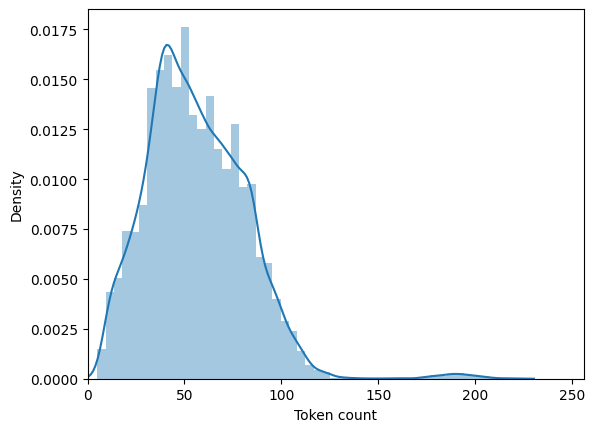

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

## EDA

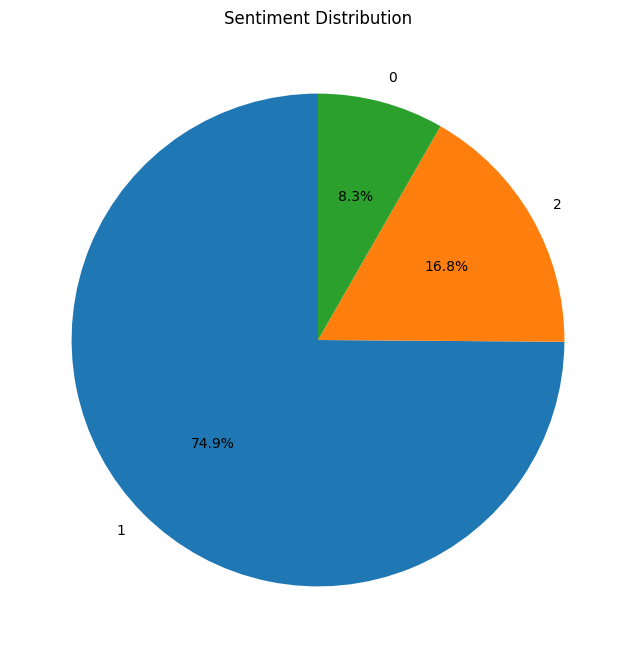

In [ ]:
import matplotlib.pyplot as plt #PERLU OVERSAMPLING

# Assuming 'df_sentiment' is your DataFrame with a 'Label' column for sentiment
sentiment_counts = df_sentiment['sentiment'].value_counts()

# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

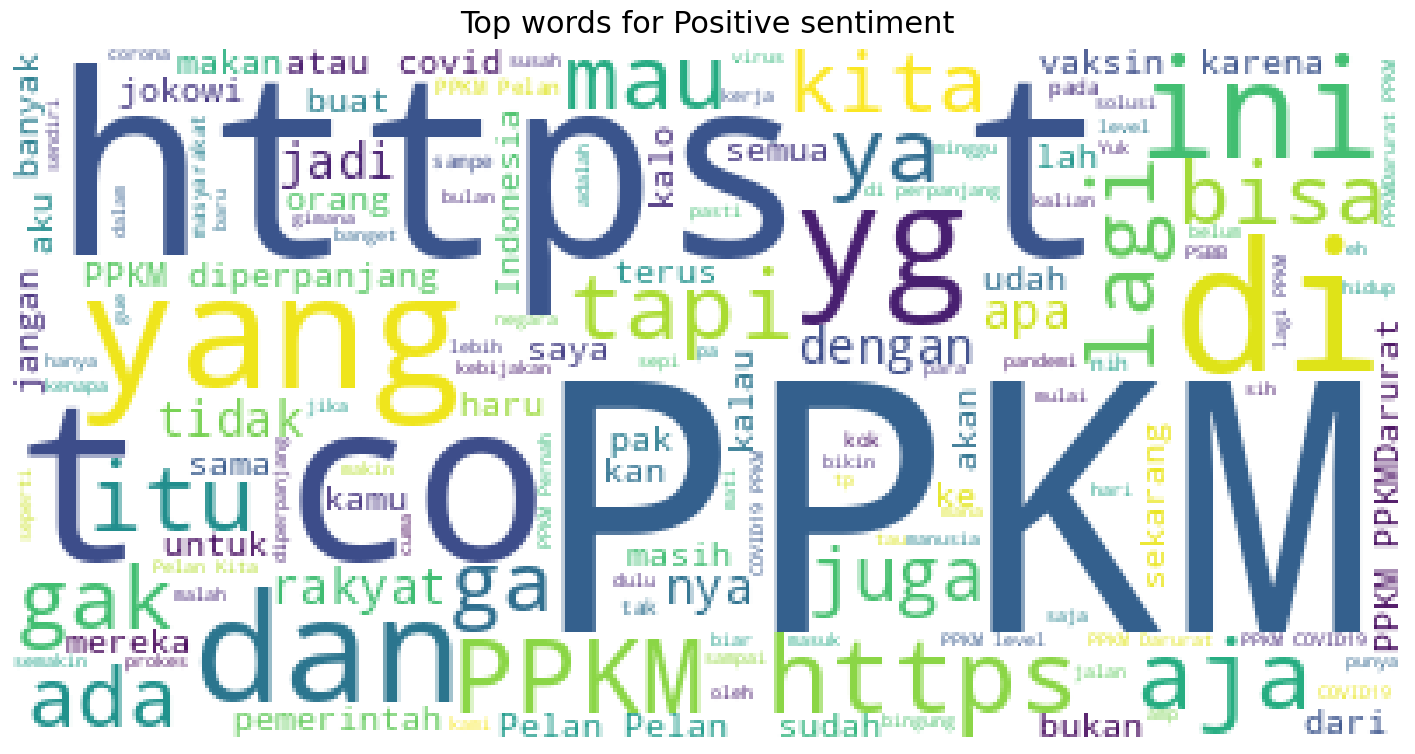

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wc = WordCloud(
    background_color='white',
    max_words=200,
)
sent = 2

wc.generate(' '.join(text for text in df_sentiment.loc[df_sentiment['sentiment'] == sent, 'Tweet']))
plt.figure(figsize=(18,10))
plt.title(f'Top words for {class_labels[sent]} sentiment',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

#Question 3

In [ ]:
MAX_LEN = 160

In [ ]:
class IndTweetDataset(Dataset):
    # Constructor Function
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    # Length magic method
    def __len__(self):
        return len(self.reviews)

    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]

        # Encoded format to be returned
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'review': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

Your class IndTweetDataset is responsible for converting raw text data (in this case, tweets or reviews) into a format that can be processed by BERT, specifically through tokenization and tensor formatting. Here's a breakdown of key components:
- Tokenization:

  The tokenizer.encode_plus() method in your code is used to tokenize the input text (review). Tokenization breaks down the text into smaller components (tokens), converting them into token IDs that represent words or subwords. BERT also adds special tokens like [CLS] (classification token) at the beginning and [SEP] (separator token) at the end of the sequence. These special tokens help BERT understand the structure of the input.
- Padding:

  BERT models require all input sequences in a batch to have the same length. Since sentences can vary in length, shorter sentences need to be padded to match the length of the longest sequence or a pre-defined max_len (provided in your dataset class). The argument pad_to_max_length=True ensures that shorter sequences are padded with zeros (0) up to the specified maximum length (max_len). Padding helps in batch processing so that sequences are aligned, but BERT needs to know which parts of the sequence are real tokens and which are padded tokens. This is where attention masks come in.
- Attention Masks:

  Attention masks tell the model which tokens should be attended to (real tokens) and which should be ignored (padding tokens). In your code, return_attention_mask=True ensures that an attention mask is returned alongside the input tokens.The attention mask contains 1 for real tokens and 0 for padded tokens, allowing BERT to focus on the meaningful parts of the input.
- Output Format:

  The __getitem__() method returns a dictionary containing:
    - input_ids: The tokenized and padded representation of the review.
    - attention_mask: A mask indicating which tokens are real (1) and which are padding (0).
    - targets: The target label for the review (converted into a tensor).


In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = IndTweetDataset(
        reviews=df.Tweet.to_numpy(),
        targets=df.sentiment.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )

In [ ]:
BATCH_SIZE = 32
SEED = 42

In [ ]:
# Example
# Example input
review = "PPKM TIDAK BERGUNA"
target = 1

# Tokenize and encode the input
encoding = tokenizer.encode_plus(
    review,
    add_special_tokens=True,
    max_length= MAX_LEN,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt'
)

display(encoding)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


{'input_ids': tensor([[    3,  6297, 15922,  1653,  8358,     1,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,  

- input_ids: These are the token IDs for each word/subword in the sentence, where 3 is [CLS] and 2 is [SEP].
- attention_mask: The model should pay attention to the first 7 tokens (real words and special tokens) and ignore the remaining tokens (which are padding 0s).

**Explanation of BERT's Attention Mechanism**

BERT uses a self-attention mechanism to understand the relationships between words in a sentence, regardless of their positions. Here's how it works:
- Self-Attention: Every token in the input can attend to every other token, including itself. This means that BERT looks at the entire sequence to understand the context of each word. For instance, in the sentence "I love this product!", the word "love" can attend to "I" and "product" to better understand its meaning.

- Attention Weights: During self-attention, BERT assigns weights to each token based on its relevance to other tokens. These weights help the model focus on the most important parts of the sequence while processing it.

- Multi-Head Attention: BERT uses multiple attention heads to capture different aspects of the relationships between tokens. Some attention heads may focus on short-range dependencies (like adjacent words), while others may focus on long-range dependencies (like connections between distant words).

**adding and Attention Masks in Self-Attention**

In padded sequences, the model needs to know which parts of the input are meaningful (actual tokens) and which are just padding. Here's how padding and attention masks are handled:
- Padding: To ensure uniform input lengths, sequences are padded. Padding tokens (0s) are added to the end of shorter sequences.
- Attention Masks: The attention mask helps BERT distinguish between real tokens and padding tokens. When computing attention, BERT will ignore the padding tokens (0s in the attention mask) and only focus on the actual tokens (1s in the mask). This ensures that padding does not interfere with the model's understanding of the sentence.

**Conclusion**

IndTweetDataset provides the functionality to tokenize and prepare input data for BERT by:
- Tokenizing the raw text and adding special tokens.
- Padding shorter sequences to match the max_len.
- Creating attention masks to differentiate real tokens from padding tokens.

The significance of these steps as:
- Tokenization: Converts text into a numerical format that BERT can process.
- Padding: Ensures uniform input size for efficient batch processing.
- Attention Masks: Help BERT focus on the meaningful parts of the input while ignoring padding.


In [ ]:
# Examples
dataloader = create_data_loader(df_sentiment[0:100], tokenizer, MAX_LEN, BATCH_SIZE)
data = next(iter(dataloader))
print(data.keys())

print(data['review'])
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

dict_keys(['review', 'input_ids', 'attention_mask', 'targets'])
['PPKM Jawa-Bali Berakhir Hari ini, Tren Kasus Covid-19 Secara Nasional Naik https://t.co/GeT6C1EWwW #Kasus #PPKM', '0 &amp; 0 sama dengan nol nil #ppkm https://t.co/cE9QBcahLi', 'Segera Mundur #PPKM (Pak Presiden Kapan Mundur)???', 'Saya menjual Mainan HOT WHEELS ORIGINAL MATTEL HOTWHEELS DIECAST box B seharga Rp14.900. Dapatkan produk ini hanya di Shopee! https://t.co/2Ng9QUUH1A #ShopeeID #PPKM #PpkmDiperpanjang https://t.co/TR1QsyovwS', 'Arus kendaraan keluar masul Terminal Tipe A Rajabasa Bandar Lampung terpantau lengang, Rabu, 3 November 2021. Tampak belum ada aktifitas lalu lalang yang padat semenjak adanya pelonggaran PPKM.\n\n#PPKM #Terminalrajabasa #bandarlampung #lampostco \nhttps://t.co/jwqiboGsN4', 'PPKM Diperpanjang hingga 28 Juni 2021, Kantor di Zona Merah Harus WFH 75 Persen\n\n#PPKM  https://t.co/Jpk9O9Bafc', '(PPKM) pura pura kamu mah :v\n\n#PPKMDaruratSolusiTepat #PPKM', 'Updated #ppkm \nhttps://t.co/62S4

#Question 4

In [ ]:
# Load the basic BERT model
bert_model = BertForSequenceClassification.from_pretrained(MODEL_NAME_ina)
bert_model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
!pip install torch-summary

In [ ]:
from torchsummary import summary

summary(bert_model,input_size=(768,), dtypes=['torch.IntTensor'])

Layer (type:depth-idx)                   Param #
├─BertModel: 1-1                         --
|    └─BertEmbeddings: 2-1               --
|    |    └─Embedding: 3-1               24,576,000
|    |    └─Embedding: 3-2               393,216
|    |    └─Embedding: 3-3               1,536
|    |    └─LayerNorm: 3-4               1,536
|    |    └─Dropout: 3-5                 --
|    └─BertEncoder: 2-2                  --
|    |    └─ModuleList: 3-6              85,054,464
|    └─BertPooler: 2-3                   --
|    |    └─Linear: 3-7                  590,592
|    |    └─Tanh: 3-8                    --
├─Dropout: 1-2                           --
├─Linear: 1-3                            2,307
Total params: 110,619,651
Trainable params: 110,619,651
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─BertModel: 1-1                         --
|    └─BertEmbeddings: 2-1               --
|    |    └─Embedding: 3-1               24,576,000
|    |    └─Embedding: 3-2               393,216
|    |    └─Embedding: 3-3               1,536
|    |    └─LayerNorm: 3-4               1,536
|    |    └─Dropout: 3-5                 --
|    └─BertEncoder: 2-2                  --
|    |    └─ModuleList: 3-6              85,054,464
|    └─BertPooler: 2-3                   --
|    |    └─Linear: 3-7                  590,592
|    |    └─Tanh: 3-8                    --
├─Dropout: 1-2                           --
├─Linear: 1-3                            2,307
Total params: 110,619,651
Trainable params: 110,619,651
Non-trainable params: 0

In [ ]:
print(bert_model.num_parameters())

110619651


In [ ]:
dataloader = create_data_loader(df_sentiment[0:100], tokenizer, MAX_LEN, BATCH_SIZE)
dataloader

In [ ]:
# Forward pass through the model for each batch
#Store true labels and predictions for evaluation
all_preds = []
all_labels = []

# Forward pass through the model for each batch
for batch in dataloader:
    input_ids = batch['input_ids']
    attention_mask = batch['attention_mask']
    labels = batch['targets']

    # Feed inputs into the BERT model
    outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)

    # Extract logits and predictions
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

    # Print predictions and actual labels
    print(f"Predicted: {predictions}, Actual: {labels}")

    # Store predictions and labels for evaluation
    all_preds.extend(predictions.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

# Metrics Evaluation
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Predicted: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]), Actual: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Predicted: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1]), Actual: tensor([1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1,
        1, 1, 1, 2, 1, 1, 1, 1])
Predicted: tensor([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 1]), Actual: tensor([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 2, 2, 1])
Predicted: tensor([1, 1, 2, 1]), Actual: tensor([1, 1, 2, 0])
Accuracy: 0.89
Precision: 0.8852672413793102
Recall: 0.89
F1-Score: 0.8811796536796537
Confusion Matrix:
[[ 3  2  1]
 [ 2 79  0]
 [ 0  6  7]]


#Question 5 without gpu

In [ ]:
df_sentiment_1000 = df_sentiment[0:1000]
df_sentiment_1000

,Tweet,sentiment
0,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,Kementerian Agama menerbitkan Surat Edaran Nom...,1
...,...,...
995,"Kasus Omicron Bertambah, PPKM Luar Jawa-Bali D...",1
996,"Kasus Omicron Meningkat, PPKM Luar Jawa-Bali D...",1
997,"#InfoEkon\n\nHai #SahabatEkon,\n\nPemerintah a...",1
998,Ketahui informasi pembagian #PPKM di wilayah J...,1


In [ ]:
df_train, df_test = train_test_split(df_sentiment_1000, stratify = df_sentiment_1000[['sentiment']] , test_size=0.2, random_state=SEED)
df_val, df_test = train_test_split(df_test, stratify = df_test[['sentiment']], test_size=0.5, random_state=SEED)

print(df_train.shape, df_val.shape, df_test.shape)

(800, 2) (100, 2) (100, 2)


In [ ]:
tokenizer

BertTokenizerFast(name_or_path='ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)
train_data_loader

In [ ]:
class SentimentClassifier(nn.Module):
    # Constructor class
    def __init__(self, n_classes, dropout):
        super(SentimentClassifier, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained(MODEL_NAME_ina)
        self.drop = nn.Dropout(p=dropout)

    # Forward propagation class
    def forward(self, input_ids, attention_mask):
        # Get the outputs from BERT (logits)
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        logits = outputs.logits

        # Apply dropout
        output = self.drop(logits)

        # Return logits after dropout
        return output


In [ ]:
# Function for a single training iteration
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        # Backward prop
        loss.backward()

        # Gradient Descent
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get model ouptuts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
# Instantiate the model and move to classifier
class_names = np.unique(df_sentiment[['sentiment']])
model = SentimentClassifier(len(class_names), 0.3)
model = model.to(device)
model

SentimentClassifier(
  (bert): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(32000, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_featu

In [ ]:
summary(model, input_size=(1, 160), col_width=16,
        depth = 4, col_names = ("num_params", "kernel_size"))

Layer (type:depth-idx)                        Param #          Kernel Shape
├─BertForSequenceClassification: 1-1          --               --
|    └─BertModel: 2-1                         --               --
|    |    └─BertEmbeddings: 3-1               --               --
|    |    |    └─Embedding: 4-1               24,576,000       [768, 32000]
|    |    |    └─Embedding: 4-2               393,216          [768, 512]
|    |    |    └─Embedding: 4-3               1,536            [768, 2]
|    |    |    └─LayerNorm: 4-4               1,536            [768]
|    |    |    └─Dropout: 4-5                 --               --
|    |    └─BertEncoder: 3-2                  --               --
|    |    |    └─ModuleList: 4-6              85,054,464       --
|    |    └─BertPooler: 3-3                   --               --
|    |    |    └─Linear: 4-7                  590,592          [768, 768]
|    |    |    └─Tanh: 4-8                    --               --
|    └─Dropout: 2-2            

Layer (type:depth-idx)                        Param #          Kernel Shape
├─BertForSequenceClassification: 1-1          --               --
|    └─BertModel: 2-1                         --               --
|    |    └─BertEmbeddings: 3-1               --               --
|    |    |    └─Embedding: 4-1               24,576,000       [768, 32000]
|    |    |    └─Embedding: 4-2               393,216          [768, 512]
|    |    |    └─Embedding: 4-3               1,536            [768, 2]
|    |    |    └─LayerNorm: 4-4               1,536            [768]
|    |    |    └─Dropout: 4-5                 --               --
|    |    └─BertEncoder: 3-2                  --               --
|    |    |    └─ModuleList: 4-6              85,054,464       --
|    |    └─BertPooler: 3-3                   --               --
|    |    |    └─Linear: 4-7                  590,592          [768, 768]
|    |    |    └─Tanh: 4-8                    --               --
|    └─Dropout: 2-2            

In [ ]:
summary(model,input_size=(768,),depth=1,batch_dim=1, dtypes=['torch.IntTensor'])

Layer (type:depth-idx)                   Param #
├─BertForSequenceClassification: 1-1     110,619,651
├─Dropout: 1-2                           --
Total params: 110,619,651
Trainable params: 110,619,651
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─BertForSequenceClassification: 1-1     110,619,651
├─Dropout: 1-2                           --
Total params: 110,619,651
Trainable params: 110,619,651
Non-trainable params: 0

In [ ]:
# Function to count trainable parameters
def count_trainable_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Print model summary and number of trainable parameters
print(model)
print(f"Trainable Parameters: {count_trainable_params(model)}")

DistilSentimentClassifier(
  (bert): DistilBertForSequenceClassification(
    (distilbert): DistilBertModel(
      (embeddings): Embeddings(
        (word_embeddings): Embedding(119547, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer): Transformer(
        (layer): ModuleList(
          (0-5): 6 x TransformerBlock(
            (attention): MultiHeadSelfAttention(
              (dropout): Dropout(p=0.1, inplace=False)
              (q_lin): Linear(in_features=768, out_features=768, bias=True)
              (k_lin): Linear(in_features=768, out_features=768, bias=True)
              (v_lin): Linear(in_features=768, out_features=768, bias=True)
              (out_lin): Linear(in_features=768, out_features=768, bias=True)
            )
            (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  

In [ ]:
# Number of iterations
EPOCHS = 20

# Optimizer Adam
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=True)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps)

# Set the loss function
loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

    # Show details
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )

    print(f"Train loss {train_loss} accuracy {train_acc}")

    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )

    print(f"Val loss {val_loss} accuracy {val_acc}")
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Epoch 1/20
----------


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 0.3330009803175926 accuracy 0.875
Val loss 0.24414531886577606 accuracy 0.91

Epoch 2/20
----------
Train loss 0.2921937888860702 accuracy 0.8825000000000001
Val loss 0.2818394862115383 accuracy 0.93

Epoch 3/20
----------
Train loss 0.18748084157705308 accuracy 0.89875
Val loss 0.23734610225073993 accuracy 0.9500000000000001

Epoch 4/20
----------
Train loss 0.1894533532857895 accuracy 0.89125
Val loss 0.23806326976045966 accuracy 0.96

Epoch 5/20
----------
Train loss 0.11864249768666923 accuracy 0.9087500000000001
Val loss 0.27218197225010954 accuracy 0.9400000000000001

Epoch 6/20
----------
Train loss 0.13169898495078086 accuracy 0.90375
Val loss 0.22874533294816501 accuracy 0.9500000000000001

Epoch 7/20
----------
Train loss 0.11257027365267276 accuracy 0.9175
Val loss 0.2427206510619726 accuracy 0.9500000000000001

Epoch 8/20
----------
Train loss 0.11611124634742737 accuracy 0.91625
Val loss 0.26951297430787235 accuracy 0.9400000000000001

Epoch 9/20
----------
Trai

##Evaluation

In [ ]:
train_acc = [t.cpu().numpy() for t in history['train_acc']]
val_acc = [t.cpu().numpy() for t in history['val_acc']]
train_acc

[array(0.875),
 array(0.8825),
 array(0.89875),
 array(0.89125),
 array(0.90875),
 array(0.90375),
 array(0.9175),
 array(0.91625),
 array(0.91375),
 array(0.90375),
 array(0.895),
 array(0.8925),
 array(0.91125),
 array(0.905),
 array(0.895),
 array(0.9025),
 array(0.89875),
 array(0.885),
 array(0.92),
 array(0.92)]

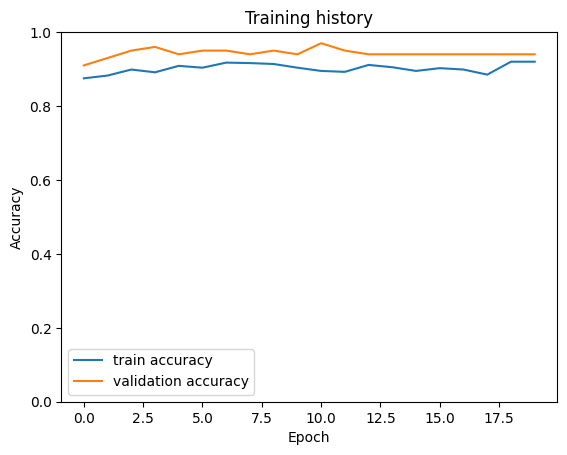

In [ ]:
# Plot training and validation accuracy
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='validation accuracy')

# Graph chars
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.9500000000000001

In [ ]:
def get_predictions(model, data_loader):
    model = model.eval()

    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["review"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get outouts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)

            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()

    return review_texts, predictions, prediction_probs, real_values

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
    model,
    test_data_loader
)
y_pred

tensor([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1])

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

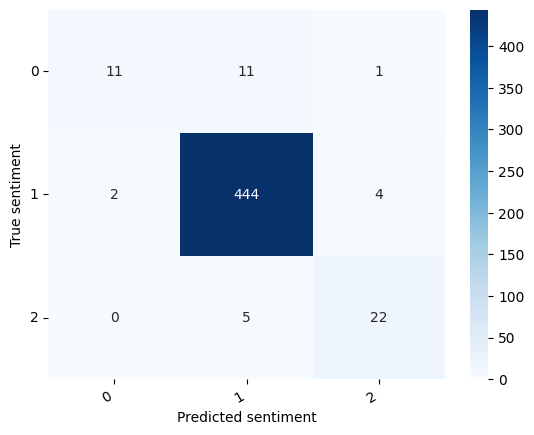

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.95
Precision: 0.9453296703296704
Recall: 0.95
F1-Score: 0.9471381215469613


# Question 6

##BERT

In [ ]:
df_sentiment_5000 = df_sentiment[0:5000]
df_sentiment_5000

,Tweet,sentiment
0,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,Kementerian Agama menerbitkan Surat Edaran Nom...,1
...,...,...
4995,Vaksinasi menjadi salah satu cara pemerintah d...,0
4996,Bioskop di tanah air dikabarkan siap beroperas...,1
4997,"Lewati Jalan Ekstrem, Perjuangan Relawan Pemul...",1
4998,"Anda setuju, kurangi belajar online, perbanyak...",1


In [ ]:
df_train, df_test = train_test_split(df_sentiment_5000, stratify = df_sentiment_5000[['sentiment']] , test_size=0.2, random_state=SEED)
df_val, df_test = train_test_split(df_test, stratify = df_test[['sentiment']], test_size=0.5, random_state=SEED)

print(df_train.shape, df_val.shape, df_test.shape)

(4000, 2) (500, 2) (500, 2)


In [ ]:
BATCH_SIZE = 32

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)
train_data_loader

In [ ]:
MODEL_NAME_ina

'ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa'

In [ ]:
# Instantiate the model and move to classifier
class_names = np.unique(df_sentiment_5000[['sentiment']])
model = SentimentClassifier(len(class_names), 0.3)
model = model.to(device)
model

SentimentClassifier(
  (bert): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(32000, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_featu

In [ ]:
print(f"Trainable Parameters: {count_trainable_params(model)}")

Trainable Parameters: 110619651


In [ ]:
# Number of iterations
EPOCHS = 20

# Optimizer Adam
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=True)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps)

# Set the loss function
loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

    # Show details
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )

    print(f"Train loss {train_loss} accuracy {train_acc}")

    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )

    print(f"Val loss {val_loss} accuracy {val_acc}")
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/20
----------


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 0.3332202562838793 accuracy 0.85675
Val loss 0.2073531877831556 accuracy 0.9400000000000001

Epoch 2/20
----------
Train loss 0.24519543328881263 accuracy 0.8715
Val loss 0.21379780917050084 accuracy 0.9420000000000001

Epoch 3/20
----------
Train loss 0.1870184821486473 accuracy 0.8855000000000001
Val loss 0.3030546692025382 accuracy 0.9400000000000001

Epoch 4/20
----------
Train loss 0.1543254474848509 accuracy 0.9015
Val loss 0.36509014101466164 accuracy 0.936

Epoch 5/20
----------
Train loss 0.1537207964360714 accuracy 0.902
Val loss 0.34379251988139004 accuracy 0.932

Epoch 6/20
----------
Train loss 0.14425499878823758 accuracy 0.89975
Val loss 0.3532466962806211 accuracy 0.9420000000000001

Epoch 7/20
----------
Train loss 0.1309679691712372 accuracy 0.9085
Val loss 0.37506417062468245 accuracy 0.9440000000000001

Epoch 8/20
----------
Train loss 0.12441033353400417 accuracy 0.9077500000000001
Val loss 0.3997130578118231 accuracy 0.9460000000000001

Epoch 9/20
-----

In [ ]:
train_acc = [t.cpu().numpy() for t in history['train_acc']]
val_acc = [t.cpu().numpy() for t in history['val_acc']]
train_acc

[array(0.85675),
 array(0.8715),
 array(0.8855),
 array(0.9015),
 array(0.902),
 array(0.89975),
 array(0.9085),
 array(0.90775),
 array(0.91025),
 array(0.9095),
 array(0.89925),
 array(0.912),
 array(0.9075),
 array(0.9065),
 array(0.91125),
 array(0.91075),
 array(0.90475),
 array(0.9115),
 array(0.91525),
 array(0.91075)]

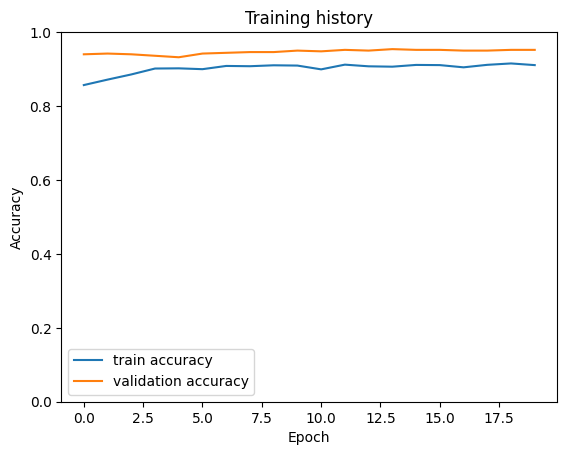

In [ ]:
# Plot training and validation accuracy
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='validation accuracy')

# Graph chars
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.9540000000000001

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
    model,
    test_data_loader
)
y_pred

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1,
        1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

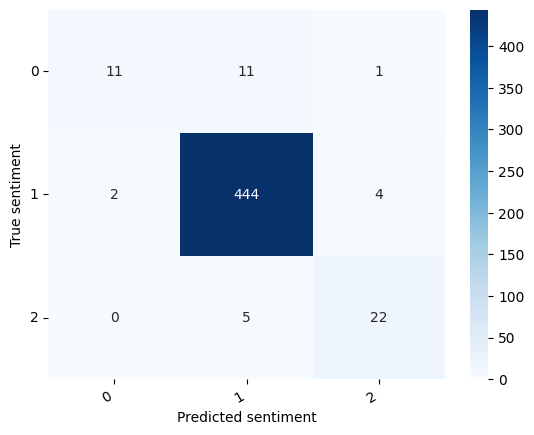

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.954
Precision: 0.9516187290969899
Recall: 0.954
F1-Score: 0.9503528693528693


##DistilBERT

In [ ]:
Distilbert_MODEL_NAME_ina = 'AptaArkana/indonesian_sentiment_distilbert_base_cased'

tokenizer_dist = AutoTokenizer.from_pretrained(Distilbert_MODEL_NAME_ina)
model_dist = AutoModelForSequenceClassification.from_pretrained(Distilbert_MODEL_NAME_ina)
model

tokenizer_config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/840 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

SentimentClassifier(
  (bert): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(32000, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_featu

In [ ]:
df_sentiment_5000 = df_sentiment[0:5000]
df_sentiment_5000

,Tweet,sentiment
0,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,Kementerian Agama menerbitkan Surat Edaran Nom...,1
...,...,...
4995,Vaksinasi menjadi salah satu cara pemerintah d...,0
4996,Bioskop di tanah air dikabarkan siap beroperas...,1
4997,"Lewati Jalan Ekstrem, Perjuangan Relawan Pemul...",1
4998,"Anda setuju, kurangi belajar online, perbanyak...",1


In [ ]:
df_train, df_test = train_test_split(df_sentiment_5000, stratify = df_sentiment_5000[['sentiment']] , test_size=0.2, random_state=SEED)
df_val, df_test = train_test_split(df_test, stratify = df_test[['sentiment']], test_size=0.5, random_state=SEED)

print(df_train.shape, df_val.shape, df_test.shape)

(4000, 2) (500, 2) (500, 2)


In [ ]:
print(tokenizer_dist, MAX_LEN, BATCH_SIZE)

DistilBertTokenizerFast(name_or_path='AptaArkana/indonesian_sentiment_distilbert_base_cased', vocab_size=119547, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
} 160 32


In [ ]:
train_data_loader = create_data_loader(df_train, tokenizer_dist, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer_dist, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer_dist, MAX_LEN, BATCH_SIZE)
train_data_loader

In [ ]:
class DistilSentimentClassifier(nn.Module):
    # Constructor class
    def __init__(self, n_classes, dropout):
        super(DistilSentimentClassifier, self).__init__()
        self.bert = AutoModelForSequenceClassification.from_pretrained(Distilbert_MODEL_NAME_ina)
        self.drop = nn.Dropout(p=dropout)

    # Forward propagation class
    def forward(self, input_ids, attention_mask):
        # Get the outputs from BERT (logits)
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        logits = outputs.logits

        # Apply dropout
        output = self.drop(logits)

        # Return logits after dropout
        return output

print(Distilbert_MODEL_NAME_ina)

AptaArkana/indonesian_sentiment_distilbert_base_cased


In [ ]:
# Instantiate the model and move to classifier
class_names = np.unique(df_sentiment_5000[['sentiment']])
model = DistilSentimentClassifier(len(class_names), 0.3)
model = model.to(device)
model

DistilSentimentClassifier(
  (bert): DistilBertForSequenceClassification(
    (distilbert): DistilBertModel(
      (embeddings): Embeddings(
        (word_embeddings): Embedding(119547, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer): Transformer(
        (layer): ModuleList(
          (0-5): 6 x TransformerBlock(
            (attention): MultiHeadSelfAttention(
              (dropout): Dropout(p=0.1, inplace=False)
              (q_lin): Linear(in_features=768, out_features=768, bias=True)
              (k_lin): Linear(in_features=768, out_features=768, bias=True)
              (v_lin): Linear(in_features=768, out_features=768, bias=True)
              (out_lin): Linear(in_features=768, out_features=768, bias=True)
            )
            (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  

In [ ]:
summary(model, input_size=(1, 160), col_width=16,
        depth = 4, col_names = ("num_params", "kernel_size"))

Layer (type:depth-idx)                             Param #          Kernel Shape
├─DistilBertForSequenceClassification: 1-1         --               --
|    └─DistilBertModel: 2-1                        --               --
|    |    └─Embeddings: 3-1                        --               --
|    |    |    └─Embedding: 4-1                    91,812,096       [768, 119547]
|    |    |    └─Embedding: 4-2                    393,216          [768, 512]
|    |    |    └─LayerNorm: 4-3                    1,536            [768]
|    |    |    └─Dropout: 4-4                      --               --
|    |    └─Transformer: 3-2                       --               --
|    |    |    └─ModuleList: 4-5                   42,527,232       --
|    └─Linear: 2-2                                 590,592          [768, 768]
|    └─Linear: 2-3                                 2,307            [768, 3]
|    └─Dropout: 2-4                                --               --
├─Dropout: 1-2                 

Layer (type:depth-idx)                             Param #          Kernel Shape
├─DistilBertForSequenceClassification: 1-1         --               --
|    └─DistilBertModel: 2-1                        --               --
|    |    └─Embeddings: 3-1                        --               --
|    |    |    └─Embedding: 4-1                    91,812,096       [768, 119547]
|    |    |    └─Embedding: 4-2                    393,216          [768, 512]
|    |    |    └─LayerNorm: 4-3                    1,536            [768]
|    |    |    └─Dropout: 4-4                      --               --
|    |    └─Transformer: 3-2                       --               --
|    |    |    └─ModuleList: 4-5                   42,527,232       --
|    └─Linear: 2-2                                 590,592          [768, 768]
|    └─Linear: 2-3                                 2,307            [768, 3]
|    └─Dropout: 2-4                                --               --
├─Dropout: 1-2                 

In [ ]:
print(f"Trainable Parameters: {count_trainable_params(model)}")

Trainable Parameters: 135326979


In [ ]:
# Number of iterations
EPOCHS = 20

# Optimizer Adam
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=True)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps)

# Set the loss function
loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

    # Show details
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )

    print(f"Train loss {train_loss} accuracy {train_acc}")

    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )

    print(f"Val loss {val_loss} accuracy {val_acc}")
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Epoch 1/20
----------


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 0.4351820506453514 accuracy 0.8375
Val loss 0.2308660401031375 accuracy 0.928

Epoch 2/20
----------
Train loss 0.27020073038339615 accuracy 0.8755000000000001
Val loss 0.2522419325541705 accuracy 0.926

Epoch 3/20
----------
Train loss 0.22324567461013795 accuracy 0.884
Val loss 0.2999630394333508 accuracy 0.9380000000000001

Epoch 4/20
----------
Train loss 0.1852006941586733 accuracy 0.89125
Val loss 0.41733101412864926 accuracy 0.9400000000000001

Epoch 5/20
----------
Train loss 0.19819516530120745 accuracy 0.89125
Val loss 0.3793675247579813 accuracy 0.928

Epoch 6/20
----------
Train loss 0.15772562676668167 accuracy 0.9025
Val loss 0.44473437033593655 accuracy 0.922

Epoch 7/20
----------
Train loss 0.13992041260143742 accuracy 0.9147500000000001
Val loss 0.5249580526724458 accuracy 0.92

Epoch 8/20
----------
Train loss 0.1417814853657037 accuracy 0.897
Val loss 0.49187096348032355 accuracy 0.93

Epoch 9/20
----------
Train loss 0.13165339152514935 accuracy 0.9105
V

In [ ]:
train_acc = [t.cpu().numpy() for t in history['train_acc']]
val_acc = [t.cpu().numpy() for t in history['val_acc']]
train_acc

[array(0.8375),
 array(0.8755),
 array(0.884),
 array(0.89125),
 array(0.89125),
 array(0.9025),
 array(0.91475),
 array(0.897),
 array(0.9105),
 array(0.9135),
 array(0.914),
 array(0.90775),
 array(0.91225),
 array(0.90225),
 array(0.9165),
 array(0.90825),
 array(0.9095),
 array(0.908),
 array(0.91),
 array(0.9085)]

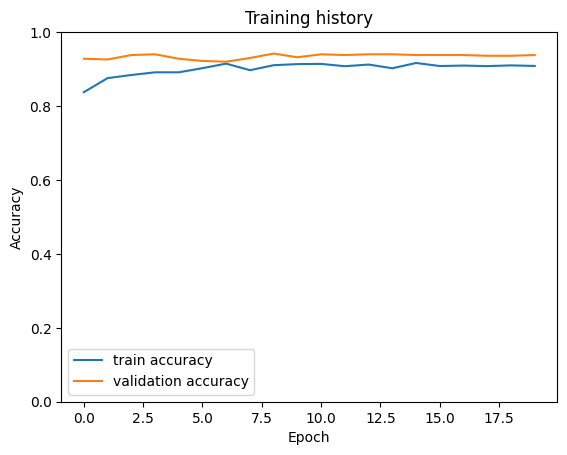

In [ ]:
# Plot training and validation accuracy
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='validation accuracy')

# Graph chars
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.9380000000000001

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
    model,
    test_data_loader
)
y_pred

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1,
        1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

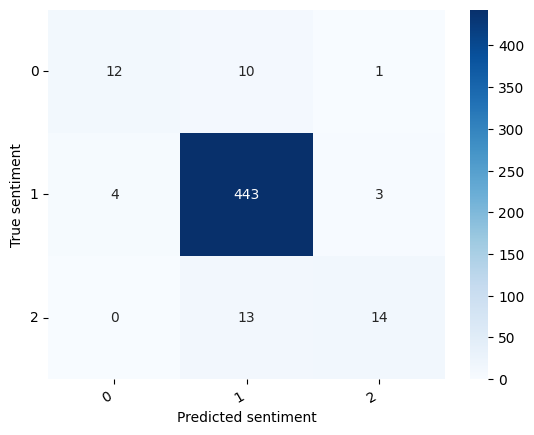

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.938
Precision: 0.932079399141631
Recall: 0.938
F1-Score: 0.9324317097749412
